### Install 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import glob
import os
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()
import time
import lightgbm as LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from catboost import CatBoostClassifier
from catboost import Pool
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from collections import defaultdict
from scipy.stats import ks_2samp
from scipy.stats import describe
from imblearn.over_sampling import SMOTENC
from collections import Counter
from IPython.display import display

In [ ]:
dataset_base_path = '/content/drive/My Drive/Colab Notebooks/Newi/2021Project3/Dataupdate' 

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         226G   43G  184G  19% /
tmpfs            64M     0   64M   0% /dev
tmpfs            18G     0   18G   0% /sys/fs/cgroup
shm              17G     0   17G   0% /dev/shm
/dev/root       2.0G  1.2G  821M  59% /sbin/docker-init
tmpfs            18G   28K   18G   1% /var/colab
/dev/sda1       233G   45G  188G  20% /etc/hosts
tmpfs            18G     0   18G   0% /proc/acpi
tmpfs            18G     0   18G   0% /proc/scsi
tmpfs            18G     0   18G   0% /sys/firmware
drive           100G   24G   77G  24% /content/drive


In [ ]:
!cat /proc/cpuinfo 

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 40
core id		: 0
cpu cores	: 20
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor

In [ ]:
!cat /proc/meminfo

MemTotal:       36961172 kB
MemFree:        33101052 kB
MemAvailable:   35451928 kB
Buffers:          146304 kB
Cached:          2457120 kB
SwapCached:            0 kB
Active:          1072724 kB
Inactive:        2051508 kB
Active(anon):     475100 kB
Inactive(anon):      568 kB
Active(file):     597624 kB
Inactive(file):  2050940 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              3932 kB
Writeback:             0 kB
AnonPages:        520692 kB
Mapped:           309788 kB
Shmem:              1184 kB
KReclaimable:     192872 kB
Slab:             407588 kB
SReclaimable:     192872 kB
SUnreclaim:       214716 kB
KernelStack:       13484 kB
PageTables:         8960 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    18480584 kB
Committed_AS:   11112384 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       16732 kB
VmallocChunk:          0 kB
Percpu:          

### Preprocessing Dataset 


In [ ]:
df = pd.read_csv("all_data2018.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16232943 entries, 0 to 16232942
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   dst_port           int64  
 1   protocol           int64  
 2   timestamp          object 
 3   flow_duration      float64
 4   tot_fwd_pkts       int64  
 5   tot_bwd_pkts       int64  
 6   totlen_fwd_pkts    int64  
 7   totlen_bwd_pkts    int64  
 8   fwd_pkt_len_max    int64  
 9   fwd_pkt_len_min    int64  
 10  fwd_pkt_len_mean   float64
 11  fwd_pkt_len_std    float64
 12  bwd_pkt_len_max    int64  
 13  bwd_pkt_len_min    int64  
 14  bwd_pkt_len_mean   float64
 15  bwd_pkt_len_std    float64
 16  flow_byts_s        float64
 17  flow_pkts_s        float64
 18  flow_iat_mean      float64
 19  flow_iat_std       float64
 20  flow_iat_max       float64
 21  flow_iat_min       float64
 22  fwd_iat_tot        float64
 23  fwd_iat_mean       float64
 24  fwd_iat_std        float64
 25  fwd_iat_max     

In [ ]:
df.columns

Index(['dst_port', 'protocol', 'timestamp', 'flow_duration', 'tot_fwd_pkts',
       'tot_bwd_pkts', 'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'flow_byts_s', 'flow_pkts_s', 'flow_iat_mean',
       'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_tot',
       'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min',
       'bwd_iat_tot', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max',
       'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fwd_header_len', 'bwd_header_len', 'fwd_pkts_s',
       'bwd_pkts_s', 'pkt_len_min', 'pkt_len_max', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fin_flag_cnt', 'syn_flag_cnt',
       'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt', 'urg_flag_cnt',
       'cwe_flag_count', 'ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg',
      

In [ ]:
df.head(3)

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_max,bwd_pkt_len_min,bwd_pkt_len_mean,bwd_pkt_len_std,flow_byts_s,flow_pkts_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_tot,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_tot,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_len,bwd_header_len,fwd_pkts_s,bwd_pkts_s,pkt_len_min,pkt_len_max,pkt_len_mean,pkt_len_std,pkt_len_var,fin_flag_cnt,syn_flag_cnt,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,cwe_flag_count,ece_flag_cnt,down_up_ratio,pkt_size_avg,fwd_seg_size_avg,bwd_seg_size_avg,fwd_byts_b_avg,fwd_pkts_b_avg,fwd_blk_rate_avg,bwd_byts_b_avg,bwd_pkts_b_avg,bwd_blk_rate_avg,subflow_fwd_pkts,subflow_fwd_byts,subflow_bwd_pkts,subflow_bwd_byts,init_fwd_win_byts,init_bwd_win_byts,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,443,6,02/03/2018 08:47:38,141385.0,9,7,553,3773,202,0,61.444443,87.534440,1460,0,539.0,655.4329,30597.30523,113.166178,9425.667,19069.11700,73403.0,1.0,141385.0,17673.125,23965.324,73403.0,22.0,51417,8569.500,13036.891,31525,1,0,0,0,0,192,152,63.655975,49.510204,0,1460,254.47058,474.71295,225352.39000,0,0,1,1,0,0,0,1,0,270.375000,61.444443,539.0,0,0,0,0,0,0,9,553,7,3773,8192.0,119.0,4,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,49684,6,02/03/2018 08:47:38,281.0,2,1,38,0,38,0,19.000000,26.870058,0,0,0.0,0.0000,135231.31670,10676.156580,140.500,174.65538,264.0,17.0,281.0,281.000,0.000,281.0,281.0,0,0.000,0.000,0,0,1,0,0,0,40,20,7117.437500,3558.718800,0,38,19.00000,21.93931,481.33334,0,1,0,0,1,0,0,0,0,25.333334,19.000000,0.0,0,0,0,0,0,0,2,38,1,0,123.0,0.0,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,443,6,02/03/2018 08:47:40,279824.0,11,15,1086,10527,385,0,98.727270,129.392500,1460,0,701.8,636.3142,41501.08640,92.915547,11192.960,24379.45000,112589.0,1.0,279728.0,27972.800,36167.742,112589.0,94.0,258924,18494.572,36356.504,133669,1,0,0,0,0,232,312,39.310425,53.605120,0,1460,430.11110,566.23420,320621.20000,0,0,1,1,0,0,0,1,1,446.653840,98.727270,701.8,0,0,0,0,0,0,11,1086,15,10527,8192.0,1047.0,5,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [ ]:
def replace_infinity_with_mean(df): #inf
    inf_columns = [c for c in df.columns if df[df[c] == np.inf][c].count() > 0]
    for col in inf_columns:
        df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)
    return df  

def replace_negative_values_with_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.values
    
    columns = [c for c in numeric_cols if df[df[c] < 0][c].count() > 0]
    for col in columns:
        mask = df[col] < 0
        df.loc[mask, col] = np.nan
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)
    return df

In [ ]:
df.shape

(16232943, 80)

In [ ]:
X = df.drop(columns=['label'])
y = df.iloc[:, -1].values.reshape(-1,1)
y = np.ravel(y)

In [ ]:
X = X.drop(columns=['timestamp', 'dst_port'])

In [ ]:
pd.Series(y).value_counts()

0     13484708
4       686012
6       576191
8       461912
1       286191
11      193360
14      187589
12      161934
9       139890
7        41508
10       10990
5         1730
2          611
3          230
13          87
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_test,y_test, train_size = 0.6, test_size = 0.4, random_state = 0, stratify = y_test)

In [ ]:
X_test1.shape

(1298636, 77)

In [ ]:
pd.Series(y_test1).value_counts()

0     1078777
4       54881
6       46095
8       36953
1       22895
11      15469
14      15007
12      12955
9       11191
7        3321
10        879
5         139
2          49
3          18
13          7
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE 
low_features = [13,3,2,5,10]

for i in low_features:
  print ("Done SMOTE for feature ",i)
  smote = SMOTE(n_jobs = -1,sampling_strategy = {i:1000})
  X_test1, y_test1 = smote.fit_sample(X_test1, y_test1)

Done SMOTE for feature  13


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Done SMOTE for feature  3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Done SMOTE for feature  2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Done SMOTE for feature  5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Done SMOTE for feature  10


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pd.Series(y_test1).value_counts()

0     1078777
4       54881
6       46095
8       36953
1       22895
11      15469
14      15007
12      12955
9       11191
7        3321
13       1000
10       1000
5        1000
3        1000
2        1000
dtype: int64

In [ ]:
X_test1.shape

(1302544, 77)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_test1,y_test1, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y_test1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_test2,y_test2, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y_test2)

In [ ]:
pd.Series(y_test2).value_counts()

0     215756
4      10976
6       9219
8       7391
1       4579
11      3094
14      3001
12      2591
9       2238
7        664
13       200
10       200
5        200
3        200
2        200
dtype: int64

In [ ]:
print (X_train3.shape , X_train2.shape, X_train1.shape , X_train.shape , X.shape)

(208407, 77) (1042035, 77) (1947953, 77) (12986354, 77) (16232943, 77)


In [ ]:
print (type(X_train3) , type(X_train2) , type(X_train1) , type(X_train))
print (type(X_test3) , type(X_test2) , type(X_test1) , type(X_test))

print (type(y_train3) , type(y_train2) , type(y_train1) , type(y_train))
print (type(y_test3) , type(y_test2) , type(y_test1) , type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
#cols = list(X_train2.head(0)) # Save name features in variable  
cols = list(X.columns)
cols[2]

'tot_fwd_pkts'

In [ ]:
X2 = pd.DataFrame(X_train2,columns = cols)
y2 = pd.DataFrame(y_train2,columns = ['label']) 

In [ ]:
print (type(y2),type(X2))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
X2.head(2)

,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_max,bwd_pkt_len_min,bwd_pkt_len_mean,bwd_pkt_len_std,flow_byts_s,flow_pkts_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_tot,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_tot,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_len,bwd_header_len,fwd_pkts_s,bwd_pkts_s,pkt_len_min,pkt_len_max,pkt_len_mean,pkt_len_std,pkt_len_var,fin_flag_cnt,syn_flag_cnt,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,cwe_flag_count,ece_flag_cnt,down_up_ratio,pkt_size_avg,fwd_seg_size_avg,bwd_seg_size_avg,fwd_byts_b_avg,fwd_pkts_b_avg,fwd_blk_rate_avg,bwd_byts_b_avg,bwd_pkts_b_avg,bwd_blk_rate_avg,subflow_fwd_pkts,subflow_fwd_byts,subflow_bwd_pkts,subflow_bwd_byts,init_fwd_win_byts,init_bwd_win_byts,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,17.0,270.0,1.0,1.0,47.0,63.0,47.0,47.0,47.0,0.0,63.0,63.0,63.0,0.0,407407.407407,7407.407407,270.0,0.0,270.0,270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,3703.7036,3703.7036,47.0,63.0,52.333332,9.237604,85.333336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,78.5,47.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,1.0,63.0,12088.350041,17682.268468,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,29.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,68965.517241,29.0,0.0,29.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,34482.7580,34482.7580,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,115.000000,256.000000,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
numeric_features = X2.dtypes[X2.dtypes != 'object'].index
X2[numeric_features] = X2[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
X2 = X2.fillna(0)

In [ ]:
df2 = pd.concat([X2, y2], axis=1)

In [ ]:
df2.shape

(1042035, 78)

In [ ]:
df2 = replace_infinity_with_mean(df2)
df2 = replace_negative_values_with_mean(df2)

### Pre-Model

In [ ]:
def print_report(ds_type, cls, X_vals, y_true, y_predict, plot_pr=False, plot_roc=False):
    print(f"Classification Report ({ds_type}):")
    print(classification_report(y_true, y_predict))
    print(f"Avg Precision Score: {average_precision_score(y_true, y_predict, average='weighted')}")
    
    if plot_roc:
        print(f"ROC AUC Score: {roc_auc_score(y_true, y_predict)}")
        skplt.metrics.plot_roc(y_true, cls.predict_proba(X_vals))
        plt.show()
        
    if plot_pr:
        
        skplt.metrics.plot_precision_recall(y_true, cls.predict_proba(X_vals))
        plt.show()
        
    print('\n')

In [ ]:
def report_acc (model_score, y_true, y_predict):
  print('Accuracy of Model: ' + str(model_score))
  precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
  print('Precision of Model: ' + (str(precision)))
  print('Recall of Model: ' + (str(recall)))
  print('F1-score of Model: ' + (str(fscore)))
  print(classification_report(y_true,y_predict))

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
rf = RandomForestClassifier(random_state = 0)
xg = xgb.XGBClassifier(n_estimators = 10)
cat = CatBoostClassifier()
light = lgb.LGBMClassifier()

def build_model (model,X_train,y_train,X_test,y_test):
    start = time.perf_counter()

    print(model)
    model.fit(X_train, y_train)

    model_score = model.score(X_test,y_test)
    y_predict = model.predict(X_test)
    y_true = y_test

    report_acc (model_score, y_true, y_predict)

    model_train=model.predict(X_train)
    model_test=model.predict(X_test)
    
    print("mission accomplished! ---------------------------------- ")
    end = time.perf_counter()
    print(f"Total Operation Time in {end - start:0.6f} seconds")

In [ ]:
def save_model(model,name_model,X_train,y_train,X_test,y_test):

    filename = name_model + '.sav' ; 
    pickle.dump(model, open('./result_model/' + filename, 'wb'))
    print("Done save model in drive: " , filename)
    loaded_model = pickle.load(open('./result_model/' + filename, 'rb'))
    result = loaded_model.score(X_test, y_test)
    print("Accuracy Model: " , result)
    train = name_model + 'train'
    train = loaded_model.predict(X_train)
    test = loaded_model.predict(X_test)

    return train, test

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

def learn_curve(X,y,c,m):
    sc = StandardScaler() 
    model = m
    lr = Pipeline(steps=(['scaler',sc], ['classifier',model]))
    cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) 
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) 
    lr.fit(X,y) 
    train_score = lr.score(X,y)
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1)
    test_scores = 1-np.mean(test_scores,axis=1)
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores":cv_scores, "train_score":train_score, "learning_curve":lc}

In [ ]:
def print_graph (lc):
  
    print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
    Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
    Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
    Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')

    sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
    plt.title("Learning Curve of Good Fit Model")
    plt.ylabel("Misclassification Rate/Loss");

### Apply Model (Stage I)

In [ ]:
build_model(rf,X_train3,y_train3,X_test3,y_test3)
rf_train , rf_test = save_model(rf,'rf_model',X_train3,y_train3,X_test3,y_test3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy of Model: 0.9818146921932729
Precision of Model: 0.9777199547142116
Recall of Model: 0.9818146921932729
F1-score of Model: 0.9787514808943931
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     34521
           1       0.95      0.99      0.97       733
           2       0.92      0.69      0.79        32
           3       1.00      0.94      0.97        32
           4       1.00      1.00      1.00      1756
           5       0.97      1.00      0.98        32
           6       1.00      0.99      1.00      1475
           7       1.00      1.00      1.00       106
           8       1.00      1.00      1.00      1183
           9       0.76      0.52      0.62       358
          10       0.91      1.00      0.96        32
          11       0.72      0.88      0.79       495
          12       0.38      0.12      0.18       415
          13       0.97      0.91      0.94        32
          14       1.00      1.00     

In [ ]:
build_model(xg,X_train3,y_train3,X_test3,y_test3)
xg_train , xg_test = save_model(xg,'xg_model',X_train3,y_train3,X_test3,y_test3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Model: 0.9698191065687827
Precision of Model: 0.9604120287740112
Recall of Model: 0.9698191065687827
F1-score of Model: 0.962514504923093
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     34521
           1       1.00      0.46      0.63       733
           2       1.00      0.12      0.22        32
           3       1.00      0.38      0.55        32
           4       1.00      1.00      1.00      1756
           5       0.97      1.00      0.98        32
           6       0.99      0.97      0.98      1475
           7       0.94      0.94      0.94       106
           8       1.00      0.99      0.99      1183
           9       0.65      0.56      0.60       358
          10       1.00      0.62      0.77        32
          11       0.71      0.78      0.74       495
          12       0.00      0.00      0.00       415
          13       1.00      0.19      0.32        32
          14       1.00      1.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mission accomplished! ---------------------------------- 
Total Operation Time in 63.364264 seconds
/content/drive/My Drive/Colab Notebooks/Newi/2021Project3
Done save model in drive:  xg_model.sav
Accuracy Model:  0.9698191065687827


In [ ]:
build_model(cat,X_train3,y_train3,X_test3,y_test3)
cat_train , cat_test = save_model(cat,'cat_model',X_train3,y_train3,X_test3,y_test3)

Learning rate set to 0.102718
0:	learn: 1.5144671	total: 266ms	remaining: 4m 25s
1:	learn: 1.2062462	total: 448ms	remaining: 3m 43s
2:	learn: 1.0134313	total: 641ms	remaining: 3m 32s
3:	learn: 0.8694785	total: 825ms	remaining: 3m 25s
4:	learn: 0.7587259	total: 1.01s	remaining: 3m 20s
5:	learn: 0.6685782	total: 1.2s	remaining: 3m 18s
6:	learn: 0.5964746	total: 1.38s	remaining: 3m 16s
7:	learn: 0.5339562	total: 1.57s	remaining: 3m 14s
8:	learn: 0.4812258	total: 1.76s	remaining: 3m 13s
9:	learn: 0.4361795	total: 1.94s	remaining: 3m 12s
10:	learn: 0.3978175	total: 2.13s	remaining: 3m 11s
11:	learn: 0.3649002	total: 2.31s	remaining: 3m 10s
12:	learn: 0.3352917	total: 2.5s	remaining: 3m 9s
13:	learn: 0.3099023	total: 2.68s	remaining: 3m 8s
14:	learn: 0.2874443	total: 2.86s	remaining: 3m 7s
15:	learn: 0.2675776	total: 3.04s	remaining: 3m 6s
16:	learn: 0.2500313	total: 3.23s	remaining: 3m 6s
17:	learn: 0.2340855	total: 3.41s	remaining: 3m 6s
18:	learn: 0.2209215	total: 3.59s	remaining: 3m 5s
1

In [ ]:
build_model(light,X_train3,y_train3,X_test3,y_test3)
light_train , light_test = save_model(light,'light_model',X_train3,y_train3,X_test3,y_test3)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Model: 0.7221822369368073
Precision of Model: 0.7388633780508689
Recall of Model: 0.7221822369368073
F1-score of Model: 0.7258102489128943
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     34521
           1       0.29      0.45      0.35       733
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        32
           4       0.08      0.23      0.12      1756
           5       0.00      0.00      0.00        32
           6       0.75      0.42      0.54      1475
           7       1.00      0.01      0.02       106
           8       0.00      0.00      0.00      1183
           9       0.00      0.00      0.00       358
          10       0.00      0.00      0.00        32
          11       0.00      0.00      0.00       495
          12       0.00      0.00      0.00       415
          13       0.00      0.00      0.00        32
          14       0.00      0.00     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mission accomplished! ---------------------------------- 
Total Operation Time in 123.187570 seconds
/content/drive/My Drive/Colab Notebooks/Newi/2021Project3
Done save model in drive:  light_model.sav
Accuracy Model:  0.7221822369368073


### Features Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f'feature {i}' for i in range(X3.shape[1])]
forest = RandomForestClassifier(n_estimators=250,random_state=0)
forest.fit(X_train3, y_train3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
df3.shape

(208407, 78)

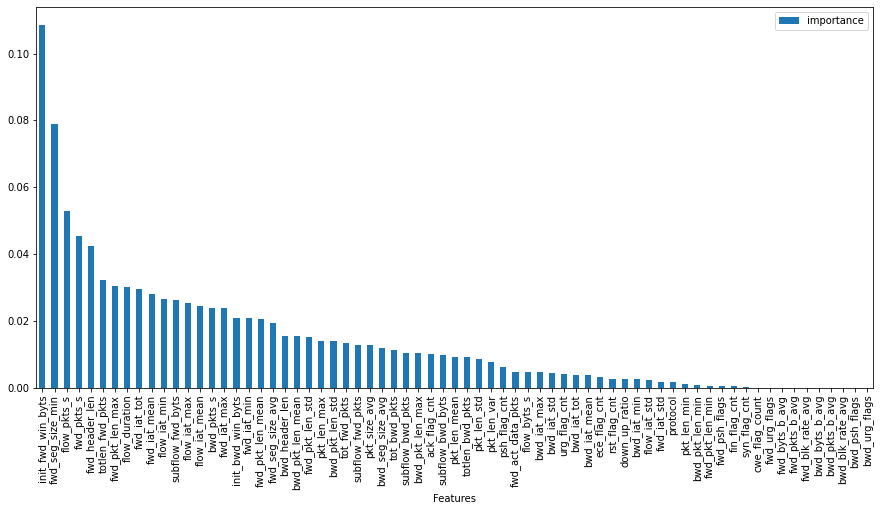

In [ ]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
refclasscol=list(df3.columns.values)
impocol = pd.DataFrame({'Features':refclasscol[0:69],'importance':importances[0:69]})
impocol = impocol.sort_values('importance',ascending=False).set_index('Features')

plt.rcParams['figure.figsize'] = (15, 7)
impocol.plot.bar();

In [ ]:
impocol.head(55)

,importance
Features,
init_fwd_win_byts,0.108490
fwd_seg_size_min,0.078871
flow_pkts_s,0.052779
fwd_pkts_s,0.045252
fwd_header_len,0.042329
totlen_fwd_pkts,0.032058
fwd_pkt_len_max,0.030269
flow_duration,0.030234
fwd_iat_tot,0.029618


In [ ]:
X_train3.shape

In [ ]:
impocol.tail(14) 

In [ ]:
impocol = pd.DataFrame({'Features':refclasscol[0:63],'importance':importances[0:63]}) 

In [ ]:
implist = impocol['Features']
implist.values.tolist()

In [ ]:
implist = ['dst_port',  'protocol',  'timestamp',  'flow_duration',  'tot_fwd_pkts',  'tot_bwd_pkts',  'totlen_fwd_pkts',  
           'totlen_bwd_pkts',  'fwd_pkt_len_max',  'fwd_pkt_len_min',  'fwd_pkt_len_mean',  'fwd_pkt_len_std',  'bwd_pkt_len_max',  
           'bwd_pkt_len_min',  'bwd_pkt_len_mean',  'bwd_pkt_len_std',  'flow_byts_s',  'flow_pkts_s',  'flow_iat_mean',  'flow_iat_std',  
           'flow_iat_max',  'flow_iat_min',  'fwd_iat_tot',  'fwd_iat_mean',  'fwd_iat_std',  'fwd_iat_max',  'fwd_iat_min',  'bwd_iat_tot',  
           'bwd_iat_mean',  'bwd_iat_std',  'bwd_iat_max',  'bwd_iat_min',  'fwd_psh_flags',  'bwd_psh_flags',  'fwd_urg_flags',  'bwd_urg_flags',  
           'fwd_header_len',  'bwd_header_len',  'fwd_pkts_s',  'bwd_pkts_s',  'pkt_len_min',  'pkt_len_max',  'pkt_len_mean',  'pkt_len_std',  
           'pkt_len_var',  'fin_flag_cnt',  'syn_flag_cnt',  'rst_flag_cnt',  'psh_flag_cnt',  'ack_flag_cnt',  'urg_flag_cnt',  'cwe_flag_count', 
           'ece_flag_cnt',  'down_up_ratio',  'pkt_size_avg']  

In [ ]:
impocol = list(implist)
print (impocol)
print (type(impocol))

In [ ]:
len(impocol)

In [ ]:
impocol.remove('bwd_urg_flags') 
impocol.remove('dst_port')      
impocol.remove('timestamp')     
impocol.remove('bwd_psh_flags') 

In [ ]:
X_new = X3[impocol]
print("Remaining amount of features:" , {len(X_new.columns)})

In [ ]:
print (X_new.shape,y3.shape)

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_new,y3, train_size = 0.8, test_size = 0.2, random_state = 0, stratify = y3)

### 5. SMOTE ENN

In [ ]:
y_train4 = np.ravel(y_train4)

In [ ]:
pd.Series(y_train4).value_counts()

0     138083
4       7025
6       5900
8       4730
1       2930
11      1980
14      1921
12      1658
9       1433
7        425
13       128
10       128
5        128
3        128
2        128
dtype: int64

In [ ]:
from imblearn.combine import SMOTEENN 
smenn = SMOTEENN()

In [ ]:
low = [2,3,5,10,13,7]
for i in low:
  print (i , ' ---------------------------------------------')
  smote = SMOTEENN(sampling_strategy = {i:1400})  
  X_train4, y_train4 = smote.fit_sample(X_train4, y_train4)

2  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

3  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

5  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

10  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

13  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

7  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
pd.Series(y_train4).value_counts()

0     133260
6       5465
4       5419
8       4502
1       2469
14      1905
13      1400
10      1400
5       1400
7       1395
3       1394
11      1036
2        988
9        661
12        61
dtype: int64

In [ ]:
low = [12,9,2]
for i in low:
  print (i , ' ---------------------------------------------')
  smote = SMOTEENN(sampling_strategy = {i:1400})  
  X_train4, y_train4 = smote.fit_sample(X_train4, y_train4)

12  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

9  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

2  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
pd.Series(y_train4).value_counts()

0     133130
4       5477
6       5475
8       4482
1       2474
14      1901
9       1282
2       1280
7       1177
10      1144
5       1142
13      1137
3       1130
11      1070
12       322
dtype: int64

In [ ]:
low = [12]
for i in low:
  print (i , ' ---------------------------------------------')
  smote = SMOTEENN(sampling_strategy = {i:1000})  
  X_train4, y_train4 = smote.fit_sample(X_train4, y_train4)

12  ---------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
pd.Series(y_train4).value_counts()

0     132827
6       5452
4       5425
8       4450
1       2441
14      1900
2       1271
9       1250
7       1173
10      1142
5       1142
13      1135
3       1127
11      1032
12       799
dtype: int64

### Apply Model (Stage II)

In [ ]:
build_model(rf,X_train4,y_train4,X_test4,y_test4) 
rf_train_new , rf_test_new = save_model(rf,'rf_model_new',X_train4,y_train4,X_test4,y_test4)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features=0.5500000000000002, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=95, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
Accuracy of Model: 0.9987206298437692
Precision of Model: 0.9987855989310361
Recall of Model: 0.9987206298437692
F1-score of Model: 0.9987126452582226
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33222
           1       1.00      1.00      1.00       612
           2       1.00      0.99      1.00       318
           3       1.00      1.00      1.00       282
           4       1

In [ ]:
build_model(xg, X_train4 , y_train4 , X_test4 , y_test4) 
xg_train_new , xg_test_new = save_model(xg,'xg_model_new', X_train4 , y_train4 , X_test4 , y_test4)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
Accuracy of Model: 0.9980071349489482
Precision of Model: 0.9980648182479999
Recall of Model: 0.9980071349489482
F1-score of Model: 0.9979959544193503
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33222
           1       1.00      1.00      1.00       612
           2       1.00      0.97      0.98       318
           3       1.00      1.00      1.00       282
           4       1.00      1.00      1.00      1359
           5       1.00      1.00      1.00       2

In [ ]:
build_model (cat, X_train4 , y_train4 , X_test4 , y_test4) 
cat_train_new , cat_test_new = save_model (cat,'cat_model_new', X_train4 , y_train4 , X_test4 , y_test4)

0:	learn: 0.3654221	total: 760ms	remaining: 48.6s
1:	learn: 0.2617605	total: 1.05s	remaining: 33.1s
2:	learn: 0.2013279	total: 1.34s	remaining: 27.6s
3:	learn: 0.1593994	total: 1.63s	remaining: 24.9s
4:	learn: 0.1278701	total: 1.94s	remaining: 23.2s
5:	learn: 0.1135756	total: 2.24s	remaining: 22s
6:	learn: 0.0866831	total: 2.53s	remaining: 21s
7:	learn: 0.0792478	total: 2.83s	remaining: 20.2s
8:	learn: 0.0738321	total: 3.13s	remaining: 19.5s
9:	learn: 0.0656904	total: 3.42s	remaining: 18.8s
10:	learn: 0.0612626	total: 3.71s	remaining: 18.2s
11:	learn: 0.0557798	total: 4s	remaining: 17.7s
12:	learn: 0.0507043	total: 4.32s	remaining: 17.3s
13:	learn: 0.0482542	total: 4.62s	remaining: 16.8s
14:	learn: 0.0431714	total: 4.9s	remaining: 16.3s
15:	learn: 0.0401822	total: 5.22s	remaining: 16s
16:	learn: 0.0382204	total: 5.52s	remaining: 15.6s
17:	learn: 0.0363021	total: 5.82s	remaining: 15.2s
18:	learn: 0.0346583	total: 6.12s	remaining: 14.8s
19:	learn: 0.0330883	total: 6.44s	remaining: 14.5s


In [ ]:
build_model (light, X_train4 , y_train4 , X_test4 , y_test4) 
light_train_new , light_test_new = save_model(light,'light_model_new', X_train4 , y_train4 , X_test4 , y_test4)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.952164731370897, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=111,
               min_child_weight=0.01, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=38, objective=None, random_state=None,
               reg_alpha=0, reg_lambda=0.1, silent=True,
               subsample=0.3029313662262354, subsample_for_bin=200000,
               subsample_freq=0)
Accuracy of Model: 0.999286505105179
Precision of Model: 0.9992842664551821
Recall of Model: 0.999286505105179
F1-score of Model: 0.9992844219636421
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33222
           1       1.00      1.00      1.00       612
           2       1.00      0.99      0.99       318
           3       1.00      1.00      1.00       282
           4       1.00      1.00      1.00      1359
          

### Hyperparameter by AutoML

In [ ]:
def run_model (X_train, y_train, X_test, y_test, model, strsave):

    build_model (model, X_train , y_train , X_test , y_test) 
    model_train_param, model_test_param = save_model (model, strsave, X_train , y_train , X_test , y_test) 
     
    lc = learn_curve(X_train, y_train,1, model)  
    print_graph(lc)

    return model_train_param, model_test_param

In [ ]:
from flaml import AutoML
automl = AutoML()

In [ ]:
def auto_param (X_train, y_train, strmodel):    

    automl_settings = {
        "time_budget": 100,
        "metric": 'accuracy',
        "task": 'classification',
        "custom_hpo_args": {"output_dir": "data/output/"},
        "gpu_per_trial": 1
    }

    automl.fit(X_train, y_train, automl_settings , estimator_list=[strmodel])

    print("-----------------------------------------------------------------")
    print(automl.predict_proba(X_train))
    print("-----------------------------------------------------------------")
    print(automl.model.estimator)
    print("-----------------------------------------------------------------")
    print (automl.model.params)

### Stage III

In [ ]:
auto_param (X_train4, y_train4, 'rf')

[flaml.automl: 11-20 18:06:49] {1485} INFO - Data split method: stratified
[flaml.automl: 11-20 18:06:49] {1489} INFO - Evaluation method: holdout
[flaml.automl: 11-20 18:06:49] {1540} INFO - Minimizing error metric: log_loss
[flaml.automl: 11-20 18:06:49] {1577} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 11-20 18:06:49] {1826} INFO - iteration 0, current learner rf
[flaml.automl: 11-20 18:06:50] {1944} INFO - Estimated sufficient time budget=81933s. Estimated necessary time budget=82s.
[flaml.automl: 11-20 18:06:50] {2029} INFO -  at 3.0s,	estimator rf's best error=0.6304,	best estimator rf's best error=0.6304
[flaml.automl: 11-20 18:06:50] {1826} INFO - iteration 1, current learner rf
[flaml.automl: 11-20 18:06:50] {2029} INFO -  at 3.4s,	estimator rf's best error=0.3744,	best estimator rf's best error=0.3744
[flaml.automl: 11-20 18:06:50] {1826} INFO - iteration 2, current learner rf
[flaml.automl: 11-20 18:06:51] {2029} INFO -  at 3.7s,	estimator rf's best erro

-----------------------------------------------------------------
-----------------------------------------------------------------
RandomForestClassifier(criterion='entropy', max_features=1.0, max_leaf_nodes=85,
                       n_estimators=4, n_jobs=-1)
-----------------------------------------------------------------
{'n_estimators': 4, 'max_features': 1.0, 'criterion': 'entropy', 'n_jobs': -1, 'max_leaf_nodes': 85, 'verbose': 0}


In [ ]:
autorf = RandomForestClassifier(criterion='entropy', max_features=0.7948210682168718,
                       max_leaf_nodes=170, n_estimators=4, n_jobs=-1)

RandomForestClassifier(max_features=1.0, max_leaf_nodes=282, n_estimators=4,
                       n_jobs=-1)
Accuracy of Model: 0.9984992003936524
Precision of Model: 0.9985618062804095
Recall of Model: 0.9984992003936524
F1-score of Model: 0.9984900037167838
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33222
           1       1.00      1.00      1.00       612
           2       1.00      0.99      0.99       318
           3       1.00      1.00      1.00       282
           4       1.00      1.00      1.00      1359
           5       1.00      1.00      1.00       286
           6       1.00      1.00      1.00      1364
           7       0.99      1.00      1.00       293
           8       1.00      1.00      1.00      1114
           9       0.91      1.00      0.95       314
          10       1.00      1.00      1.00       286
          11       1.00      0.88      0.94       260
          12       0.99      0.94  

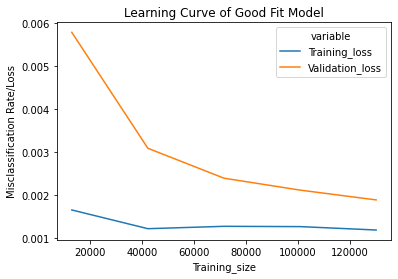

In [ ]:
autorf_train_param, autorf_test_param = run_model (X_train4, y_train4, X_test4, y_test4, autorf, 'autorf_model_para')

In [ ]:
auto_param (X_train4, y_train4, 'xgboost')

[flaml.automl: 11-20 17:49:05] {1485} INFO - Data split method: stratified
[flaml.automl: 11-20 17:49:05] {1489} INFO - Evaluation method: holdout
[flaml.automl: 11-20 17:49:05] {1540} INFO - Minimizing error metric: log_loss
[flaml.automl: 11-20 17:49:05] {1577} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 11-20 17:49:05] {1826} INFO - iteration 0, current learner xgboost
[flaml.automl: 11-20 17:49:06] {1944} INFO - Estimated sufficient time budget=133160s. Estimated necessary time budget=133s.
[flaml.automl: 11-20 17:49:06] {2029} INFO -  at 4.0s,	estimator xgboost's best error=1.3770,	best estimator xgboost's best error=1.3770
[flaml.automl: 11-20 17:49:06] {1826} INFO - iteration 1, current learner xgboost
[flaml.automl: 11-20 17:49:07] {2029} INFO -  at 4.9s,	estimator xgboost's best error=1.3770,	best estimator xgboost's best error=1.3770
[flaml.automl: 11-20 17:49:07] {1826} INFO - iteration 2, current learner xgboost
[flaml.automl: 11-20 17:49:08] {2029}

-----------------------------------------------------------------
-----------------------------------------------------------------
XGBClassifier(colsample_bylevel=0.8461545925967309,
              colsample_bytree=0.7578325666214893, grow_policy='lossguide',
              learning_rate=0.6461109884314401, max_depth=0, max_leaves=12,
              min_child_weight=0.8466284808746228, n_estimators=4, n_jobs=-1,
              objective='multi:softprob', reg_alpha=0.0633928775829671,
              reg_lambda=3.2153305687342706, subsample=0.8471714262755639,
              tree_method='hist', use_label_encoder=False, verbosity=0)
-----------------------------------------------------------------
{'n_estimators': 4, 'max_leaves': 12, 'min_child_weight': 0.8466284808746228, 'learning_rate': 0.6461109884314401, 'subsample': 0.8471714262755639, 'colsample_bylevel': 0.8461545925967309, 'colsample_bytree': 0.7578325666214893, 'reg_alpha': 0.0633928775829671, 'reg_lambda': 3.2153305687342706, 'n_jo

In [ ]:
autoxg = XGBClassifier(colsample_bylevel=0.8461545925967309,
              colsample_bytree=0.7578325666214893, grow_policy='lossguide',
              learning_rate=0.6461109884314401, max_depth=0, max_leaves=12,
              min_child_weight=0.8466284808746228, n_estimators=4, n_jobs=-1,
              objective='multi:softprob', reg_alpha=0.0633928775829671,
              reg_lambda=3.2153305687342706, subsample=0.8471714262755639,
              tree_method='hist', use_label_encoder=False, verbosity=0)

XGBClassifier(colsample_bylevel=0.8461545925967309,
              colsample_bytree=0.7578325666214893, grow_policy='lossguide',
              learning_rate=0.6461109884314401, max_depth=0, max_leaves=12,
              min_child_weight=0.8466284808746228, n_estimators=4, n_jobs=-1,
              objective='multi:softprob', reg_alpha=0.0633928775829671,
              reg_lambda=3.2153305687342706, subsample=0.8471714262755639,
              tree_method='hist', use_label_encoder=False, verbosity=0)
Accuracy of Model: 0.9968753844261287
Precision of Model: 0.9969219657884284
Recall of Model: 0.9968753844261287
F1-score of Model: 0.9968384410165624
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33222
           1       1.00      0.99      1.00       612
           2       0.99      0.91      0.95       318
           3       1.00      0.99      1.00       282
           4       0.99      1.00      1.00      1359
           5       1.00

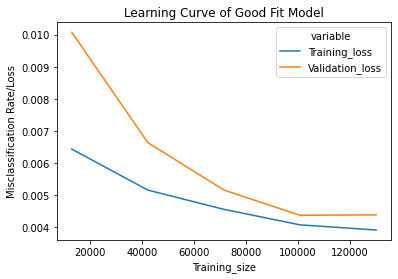

In [ ]:
autoxg_train_param, autoxg_test_param = run_model (X_train4, y_train4, X_test4, y_test4, autoxg, 'autoxg_model_para')

In [ ]:
auto_param (X_train4, y_train4, 'catboost')

[flaml.automl: 11-20 17:39:19] {1485} INFO - Data split method: stratified
[flaml.automl: 11-20 17:39:19] {1489} INFO - Evaluation method: holdout
[flaml.automl: 11-20 17:39:19] {1540} INFO - Minimizing error metric: log_loss
[flaml.automl: 11-20 17:39:19] {1577} INFO - List of ML learners in AutoML Run: ['catboost']
[flaml.automl: 11-20 17:39:19] {1826} INFO - iteration 0, current learner catboost
[flaml.automl: 11-20 17:39:21] {1944} INFO - Estimated sufficient time budget=290802s. Estimated necessary time budget=291s.
[flaml.automl: 11-20 17:39:21] {2029} INFO -  at 4.8s,	estimator catboost's best error=0.1271,	best estimator catboost's best error=0.1271
[flaml.automl: 11-20 17:39:21] {1826} INFO - iteration 1, current learner catboost
[flaml.automl: 11-20 17:39:23] {2029} INFO -  at 6.6s,	estimator catboost's best error=0.1271,	best estimator catboost's best error=0.1271
[flaml.automl: 11-20 17:39:23] {1826} INFO - iteration 2, current learner catboost
[flaml.automl: 11-20 17:39:25

-----------------------------------------------------------------
-----------------------------------------------------------------
-----------------------------------------------------------------
{'early_stopping_rounds': 11, 'learning_rate': 0.2, 'n_estimators': 126, 'thread_count': -1, 'verbose': False, 'random_seed': 10242048}


In [ ]:
autocat = CatBoostClassifier(early_stopping_rounds = 11, learning_rate = 0.2, n_estimators = 126,
                             thread_count =  -1, verbose = False, random_seed =  10242048)

Accuracy of Model: 0.9976380858654201
Precision of Model: 0.9977009234967827
Recall of Model: 0.9976380858654201
F1-score of Model: 0.9976156600321622
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33222
           1       1.00      0.99      1.00       612
           2       0.99      0.92      0.95       318
           3       1.00      1.00      1.00       282
           4       1.00      1.00      1.00      1359
           5       1.00      1.00      1.00       286
           6       1.00      1.00      1.00      1364
           7       0.99      1.00      1.00       293
           8       1.00      1.00      1.00      1114
           9       0.91      1.00      0.95       314
          10       0.99      1.00      1.00       286
          11       1.00      0.88      0.94       260
          12       0.95      0.94      0.95       176
          13       1.00      1.00      1.00       284
          14       1.00      1.00     

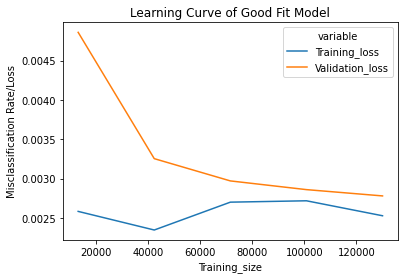

In [ ]:
autocat_train_param, autocat_test_param = run_model (X_train4, y_train4, X_test4, y_test4, autocat, 'autocat_model_para')

In [ ]:
auto_param (X_train4, y_train4, 'lgbm')

[flaml.automl: 11-20 17:37:11] {1485} INFO - Data split method: stratified
[flaml.automl: 11-20 17:37:11] {1489} INFO - Evaluation method: holdout
[flaml.automl: 11-20 17:37:12] {1540} INFO - Minimizing error metric: log_loss
[flaml.automl: 11-20 17:37:12] {1577} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl: 11-20 17:37:12] {1826} INFO - iteration 0, current learner lgbm
[flaml.automl: 11-20 17:37:12] {1944} INFO - Estimated sufficient time budget=45319s. Estimated necessary time budget=45s.
[flaml.automl: 11-20 17:37:12] {2029} INFO -  at 3.6s,	estimator lgbm's best error=0.4347,	best estimator lgbm's best error=0.4347
[flaml.automl: 11-20 17:37:12] {1826} INFO - iteration 1, current learner lgbm
[flaml.automl: 11-20 17:37:12] {2029} INFO -  at 3.9s,	estimator lgbm's best error=0.4347,	best estimator lgbm's best error=0.4347
[flaml.automl: 11-20 17:37:12] {1826} INFO - iteration 2, current learner lgbm
[flaml.automl: 11-20 17:37:13] {2029} INFO -  at 4.2s,	estimato

-----------------------------------------------------------------
-----------------------------------------------------------------
LGBMClassifier(colsample_bytree=0.832361601243933,
               learning_rate=0.30134099897732936, max_bin=511,
               min_child_samples=8, n_estimators=43, num_leaves=20,
               reg_alpha=0.002606008350542268, reg_lambda=0.5487740986174037,
               verbose=-1)
-----------------------------------------------------------------
{'n_estimators': 43, 'num_leaves': 20, 'min_child_samples': 8, 'learning_rate': 0.30134099897732936, 'colsample_bytree': 0.832361601243933, 'reg_alpha': 0.002606008350542268, 'reg_lambda': 0.5487740986174037, 'n_jobs': -1, 'max_bin': 511, 'verbose': -1}


In [ ]:
autolight = lgb.LGBMClassifier(colsample_bytree=0.832361601243933,
                  learning_rate=0.30134099897732936, max_bin=511,
                  min_child_samples=8, n_estimators=43, num_leaves=20,
                  reg_alpha=0.002606008350542268, reg_lambda=0.5487740986174037,
                  verbose=-1)

LGBMClassifier(colsample_bytree=0.832361601243933,
               learning_rate=0.30134099897732936, max_bin=511,
               min_child_samples=8, n_estimators=43, num_leaves=20,
               reg_alpha=0.002606008350542268, reg_lambda=0.5487740986174037,
               verbose=-1)
Accuracy of Model: 0.9992372985607085
Precision of Model: 0.999237077279667
Recall of Model: 0.9992372985607085
F1-score of Model: 0.9992366124516587
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33222
           1       1.00      1.00      1.00       612
           2       1.00      0.99      1.00       318
           3       1.00      1.00      1.00       282
           4       1.00      1.00      1.00      1359
           5       1.00      1.00      1.00       286
           6       1.00      1.00      1.00      1364
           7       0.99      0.99      0.99       293
           8       1.00      1.00      1.00      1114
           9       0.9

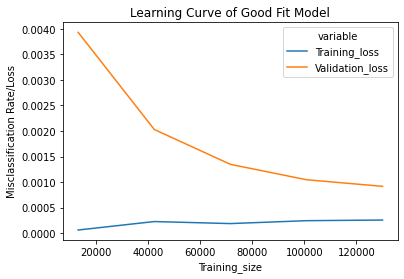

In [ ]:
autolight_train_param, autolight_test_param = run_model (X_train4, y_train4, X_test4, y_test4, autolight, 'autolight_model_para')

### Stacking

In [ ]:
 def load_model(file,X_traino,X_testo,y_traino,y_testo): 
  loaded_model = pickle.load(open('./result_model/' + file , 'rb'))
  result = loaded_model.score(X_testo, y_testo)
  print("Accuracy Model ", result)

  train = loaded_model.predict(X_traino)
  test = loaded_model.predict(X_testo)

  return train, test

In [ ]:
X_train4.shape , X_test4.shape , y_train4.shape , y_test4.shape 

((162577, 63), (40645, 63), (162577,), (40645,))

In [ ]:
from xgboost import XGBClassifier

In [ ]:
rf = RandomForestClassifier(max_features = 0.5500000000000002, n_estimators = 95) 
xg = XGBClassifier (colsample_bytree = 0.8, gamma = 2 , max_depth = 5, min_child_weight = 5, subsample = 0.8)
cat = CatBoostClassifier (depth = 8, iterations = 65 , learning_rate = 0.43573845045893345 )
light = lgb.LGBMClassifier (colsample_bytree = 0.952164731370897, min_child_samples = 111, min_child_weight = 0.01, 
                            num_leaves = 38, reg_alpha = 0, reg_lambda = 0.1, subsample = 0.3029313662262354 )

autolight = lgb.LGBMClassifier(colsample_bytree=0.832361601243933,
                               learning_rate=0.30134099897732936, max_bin=511,
                               min_child_samples=8, n_estimators=43, num_leaves=20,
                               reg_alpha=0.002606008350542268, reg_lambda=0.5487740986174037,
                               verbose=-1)

In [ ]:
autorf_train_param , autorf_test_param = load_model('autorf_model_para.sav',X_train4,X_test4,y_train4,y_test4)  

Accuracy Model  0.9984992003936524


In [ ]:
autoxg_train_param , autoxg_test_param = load_model('autoxg_model_para.sav',X_train4,X_test4,y_train4,y_test4)  

Accuracy Model  0.9968753844261287


In [ ]:
autocat_train_param , autocat_test_param = load_model('autocat_model_para.sav',X_train4,X_test4,y_train4,y_test4)  

Accuracy Model  0.9976380858654201


In [ ]:
autolight_train_param , autolight_test_param = load_model('autolight_model_para.sav',X_train4,X_test4,y_train4,y_test4)  

Accuracy Model  0.9992372985607085


In [ ]:
base_predictions_train = pd.DataFrame( {
    #'RandomForest': autorf_train_param.ravel(),
    'XgBoost': autoxg_train_param.ravel(),
    'CatBoost': autocat_train_param.ravel(), 
    'Lightgbm': autolight_train_param.ravel(),
    })
base_predictions_train.head(9) 

,XgBoost,CatBoost,Lightgbm
0,3,3,3
1,0,0,0
2,0,0,0
3,0,0,0
4,4,4,4
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0


In [ ]:
autorf_train_param = autorf_train_param.reshape(-1, 1)
autoxg_train_param = autoxg_train_param.reshape(-1, 1)
autocat_train_param = autocat_train_param.reshape(-1, 1)
autolight_train_param = autolight_train_param.reshape(-1, 1)

autorf_test_param = autorf_test_param.reshape(-1, 1)
autoxg_test_param = autoxg_test_param.reshape(-1, 1)
autocat_test_param = autocat_test_param.reshape(-1, 1)
autolight_test_param = autolight_test_param.reshape(-1, 1)


In [ ]:
#X_train_stack = np.concatenate(( autorf_train_param, autoxg_train_param, autocat_train_param, autolight_train_param), axis=1)
#X_test_stack = np.concatenate((  autorf_test_param, autoxg_test_param, autocat_test_param, autolight_test_param), axis=1)

X_train_stack = np.concatenate(( autoxg_train_param, autocat_train_param, autolight_train_param), axis=1)
X_test_stack = np.concatenate((  autoxg_test_param, autocat_test_param, autolight_test_param), axis=1)

### Stage IV

XGBClassifier(colsample_bylevel=0.8461545925967309,
              colsample_bytree=0.7578325666214893, grow_policy='lossguide',
              learning_rate=0.6461109884314401, max_depth=0, max_leaves=12,
              min_child_weight=0.8466284808746228, n_estimators=4, n_jobs=-1,
              objective='multi:softprob', reg_alpha=0.0633928775829671,
              reg_lambda=3.2153305687342706, subsample=0.8471714262755639,
              tree_method='hist', use_label_encoder=False, verbosity=0)
Accuracy of Model: 0.9993111083774142
Precision of Model: 0.9993102580826004
Recall of Model: 0.9993111083774142
F1-score of Model: 0.9993098651395923
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33222
           1       1.00      1.00      1.00       612
           2       0.99      1.00      1.00       318
           3       1.00      1.00      1.00       282
           4       1.00      1.00      1.00      1359
           5       1.00

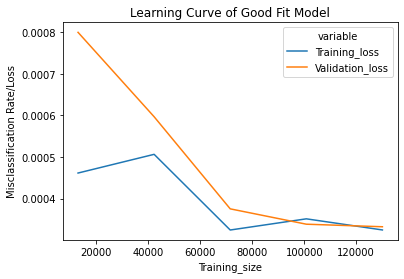

In [ ]:
autoxg_train_param, autoxg_test_param = run_model (X_train_stack, y_train4, X_test_stack, y_test4, autoxg, 'autoxg_stack_para') #Stack 3

XGBClassifier(colsample_bylevel=0.8461545925967309,
              colsample_bytree=0.7578325666214893, grow_policy='lossguide',
              learning_rate=0.6461109884314401, max_depth=0, max_leaves=12,
              min_child_weight=0.8466284808746228, n_estimators=4, n_jobs=-1,
              objective='multi:softprob', reg_alpha=0.0633928775829671,
              reg_lambda=3.2153305687342706, subsample=0.8471714262755639,
              tree_method='hist', use_label_encoder=False, verbosity=0)
Accuracy of Model: 0.9991142821995326
Precision of Model: 0.9991145755338966
Recall of Model: 0.9991142821995326
F1-score of Model: 0.9991124508384596
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33222
           1       1.00      1.00      1.00       612
           2       0.98      0.99      0.98       318
           3       1.00      1.00      1.00       282
           4       1.00      1.00      1.00      1359
           5       1.00

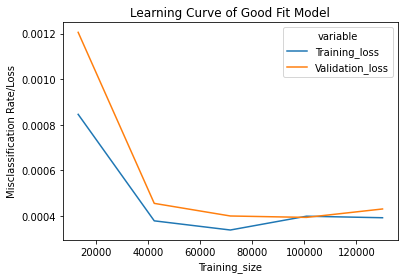

In [ ]:
autoxg_train_param, autoxg_test_param = run_model (X_train_stack, y_train4, X_test_stack, y_test4, autoxg, 'autoxg_stack_para') # Stack 4 